In [267]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

CONTEXT = 'paper'  # talk is large, paper is small
FIG_TYPE = 'pdf'
plt.rcParams['figure.dpi'] = 70
sns.set_theme(context=CONTEXT, style='ticks', palette=sns.color_palette(['#c81818', '#545454']))

## Number of records

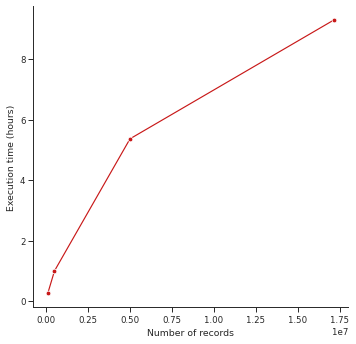

In [268]:
x = [
    100_000,
    500_000,
    5_000_000,
    17_159_057
]
y = [
    datetime.timedelta(minutes=15, seconds=23),
    datetime.timedelta(minutes=59, seconds=57),
    datetime.timedelta(hours=5, minutes=22),
    datetime.timedelta(hours=9, minutes=18)
]
y = [d.total_seconds() / 3600 for d in y]

g = sns.relplot(x=x, y=y, kind='line', marker='o')
g.set_axis_labels('Number of records', 'Execution time (hours)')
g.despine()
plt.savefig(f'plot_num_records.{FIG_TYPE}', bbox_inches='tight')
plt.show()

## Number of CPUs

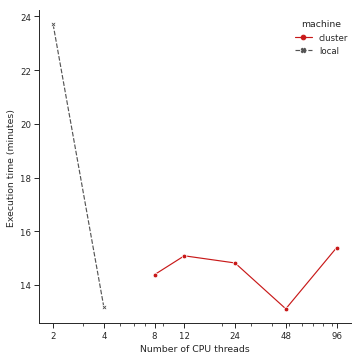

In [269]:
# 100K records

df = pd.DataFrame({
    'machine': 5 * ['cluster'] + 2 * ['local'],
    'num_cpus': [24 * 4, 12 * 4, 6 * 4, 3 * 4, 2 * 4, 4, 2],
    'running_time': [
        datetime.timedelta(minutes=15, seconds=23),
        np.mean([datetime.timedelta(minutes=12, seconds=41), datetime.timedelta(minutes=13, seconds=32)]),
        datetime.timedelta(minutes=14, seconds=49),
        datetime.timedelta(minutes=15, seconds=5),
        datetime.timedelta(minutes=14, seconds=23),
        datetime.timedelta(seconds=790),
        datetime.timedelta(seconds=1422),
        # datetime.timedelta(minutes=40)  # TODO
    ]
})
df['running_time_min'] = df['running_time'].apply(lambda d: d.total_seconds() / 60)

g = sns.relplot(
    data=df, x='num_cpus', y='running_time_min', 
    kind='line', hue='machine', style='machine', markers=True
)
g.set_axis_labels('Number of CPU threads', 'Execution time (minutes)')
g.ax.set_xscale('log')
g.ax.set_xticks(df['num_cpus'])
g.ax.set_xticklabels(df['num_cpus'])
g._legend._loc = 3
if CONTEXT == 'paper':
    g._legend.set_bbox_to_anchor([.7, .85])
else:  # talk
    g._legend.set_bbox_to_anchor([.45, .70])
plt.savefig(f'plot_num_cpus.{FIG_TYPE}', bbox_inches='tight')
plt.show()

## Number of attributes

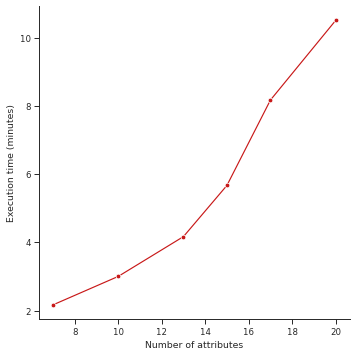

In [270]:
x = [7, 10, 13, 15, 17, 20]
y = [130, 180, 250, 340, 490, 630]
y = list(map(lambda t: t / 60, y))

g = sns.relplot(x=x, y=y, kind='line', marker='o')
g.set_axis_labels('Number of attributes', 'Execution time (minutes)')
plt.savefig(f'plot_num_attrs.{FIG_TYPE}', bbox_inches='tight')
plt.show()

## Sampling ratio

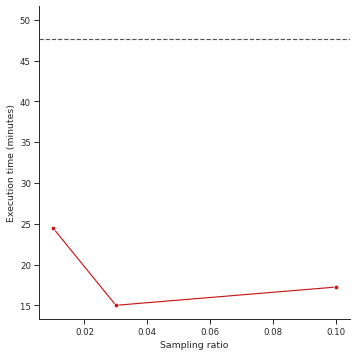

In [271]:
sampling_ratio = [.01, .03, .10]
running_time = [1469, 901, 1035]
no_sampling = 2856 / 60

x = sampling_ratio
y = list(map(lambda t: t / 60, running_time))

g = sns.relplot(x=x, y=y, kind='line', marker='o')
g.set_axis_labels('Sampling ratio', 'Execution time (minutes)')
g.ax.axhline(no_sampling, linestyle='--', color=sns.color_palette()[1])
g.ax.set_ylim([800 / 60, 3100 / 60])
plt.savefig(f'plot_sampling_ratio.{FIG_TYPE}', bbox_inches='tight')
plt.show()